In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
from __future__ import division

Zadanie 1 - implementacja jawnych metod włożonych dowolnego rzędu

In [25]:
class SystemSolver():
    def __init__(self,updates = None):
        if isinstance(updates,list):
            max_len = max([len(x) for x in updates])
            [x.extend([0]*(max_len-len(x))) for x in updates]
            self.updates = numpy.asarray(updates, dtype = float64)
        else:
            self.updates = updates
        
    @property
    def update_count(self):
        return min(self.updates.shape)-1
    
    def __call__(self,tn,yn,functions,h):
        k = np.zeros(shape=(self.update_count,len(functions)))
        for i in range(self.update_count):
            a = self.updates[i,0]
            b = self.updates[i,1:]
            upd = np.sum(b[:,np.newaxis]*k,axis = 0)
            for j in range(len(functions)):
                k[i,j]= h * functions[j](tn+a*h, yn+upd)
        c = self.updates[self.update_count,1:]
        if self.updates.shape[0]>self.updates.shape[1]:
            c_= self.updates[self.update_count+1,1:]
            return np.sum(c[:,np.newaxis]*k, axis = 0), np.sum(c_[:,np.newaxis]*k, axis = 0)
        return np.sum(c[:,np.newaxis]*k, axis = 0)

Prezetacja metod

In [27]:
def draw_system(method, t_0, y_0s, approx, exact = None, labels=None, step = 0.1):
    count = np.ceil(10.0/step)
    X = np.linspace(t_0,t_0+10,count)
    Y = np.zeros(shape=(len(approx),X.shape[0]))
    if exact:
        RY = np.asarray([y(X) if y is not None else None for y in exact])
    Y[:,0] = np.asarray(y_0s)
    
    for i in np.arange(1,count):
        Y_updates = method(tn=X[i-1],yn=Y[:,i-1],functions=approx,h=step)
        if isinstance(Y_updates,tuple):
            Y[:,i] = Y[:,i-1] + Y_updates[1]
        else:
            Y[:,i] = Y[:,i-1] + Y_updates
    
    figure_count = len(approx)
    if exact:
        figure_count += len(filter(lambda x: x is not None,exact))
    figure = 1
    plt.figure(figsize = (9,figure_count*3))
    for i in range(len(approx)):
        ax = plt.subplot(figure_count,1,figure)
        if labels and labels[i]:
            ax.set_title(labels[i])
        plt.plot(X,Y[i], color = 'blue', label ='Approx')
        if exact and exact[i]:
            plt.plot(X,RY[i], color = 'red', linestyle='--', label='Exact')
        plt.legend(loc = 'upper left')
        figure += 1

        if exact and exact[i]:
            plt.subplot(figure_count,1,figure)
            plt.plot(X,np.abs(RY[i]-Y[i]), color = 'blue', label= 'Global error')
            plt.legend(loc = 'upper left')
            figure+=1
            
    plt.show()

metoda eulera

In [6]:
euler = SystemSolver([[1],[0,1]])

In [7]:
euler(0,np.array([1.,0.]),[lambda x,ys: np.exp(x), lambda x, ys: np.sin(x)],0.0011)

array([  1.10121067e-03,   1.20999976e-06])

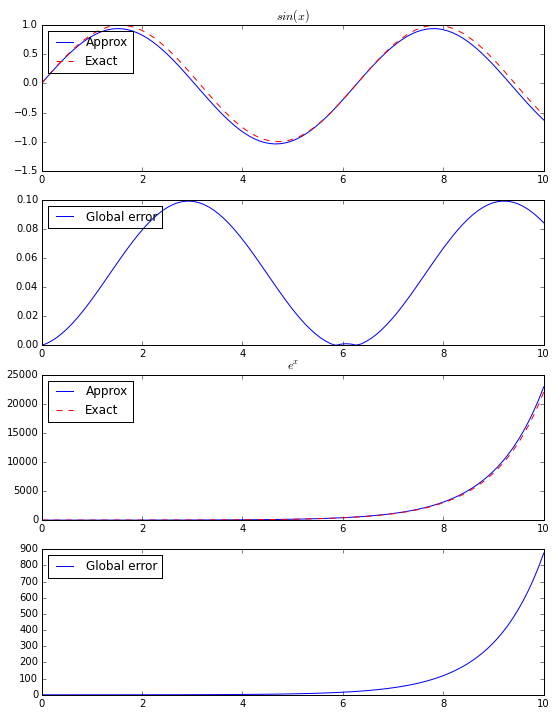

In [29]:
draw_system(euler,
            0,
            [0.,1.],
            [lambda t,ys:np.cos(t),lambda t,ys: np.exp(t)],
            [lambda t: np.sin(t),lambda t: np.exp(t)],
            [u"$sin(x)$",u"$e^x$"])

Metoda R-K-F 7(8)

In [135]:
fehlberg_7_8 = SystemSolver([
                [0],
                [2/27,2/27],
                [1/9,1/36,1/12],
                [1/6,1/24,0,1/8],
                [5/12,5/12,0,-25/16,25/16],
                [1/2,1/20,0,0,1/4,1/5],
                [5/6,-25/108,0,0,125/108,-65/27,125/54],
                [1/6,31/300,0,0,0,61/225,-2/9,13/900],
                [2/3,2,0,0,-53/6,704/45,-107/9,67/90,3],
                [1/3,-91/108,0,0,23/108,-976/135,311/54,-19/60,17/6,-1/12],
                [1,2383/4100,0,0,-341/164,4496/1025,-301/82,2133/4100,45/82,45/164,18/41],
                [0,3/205,0,0,0,0,-6/41,-3/205,-3/41,3/41,6/41,0],
                [1,-1777/4100,0,0,-341/164,4496/1025,-289/82,2193/4100,51/82,33/164,19/41,0,1],
                [0,41/840,0,0,0,0,34/105,9/35,9/35,9/280,9/280,41/840,0,0],
                [0,0,0,0,0,0,34/105,9/35,9/35,9/280,9/280,0,41/840,41/840]])
fehlberg_7_8.ranks = (7,8)

In [53]:
y1, y2 = fehlberg_7_8(0,[1.],[lambda x,ys: np.exp(x)],0.0011)
print y1, y2, np.abs(y1-y2)

[ 0.00110061] [ 0.00110061] [  2.16840434e-19]


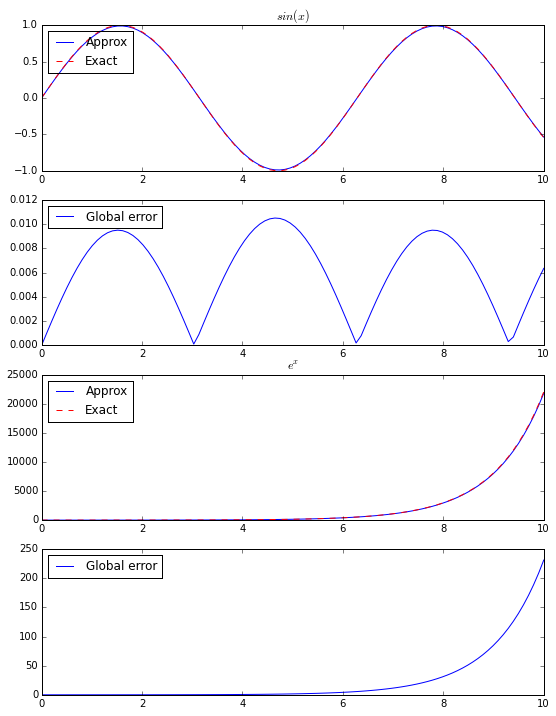

In [54]:
draw_system(fehlberg_7_8,
            0,
            [0.,1.],
            [lambda t,ys:np.cos(t),lambda t,ys: np.exp(t)],
            [lambda t: np.sin(t),lambda t: np.exp(t)],
            [u"$sin(x)$",u"$e^x$"])

Metoda R-K-F 4 (5)

In [136]:
fehlberg_4_5 = SystemSolver([[0],
                            [1/4,1/4],
                            [3/8,3/32,9/32],
                            [12/13,1932/2197,-7200/2197,7296/2197],
                            [1,439/216,-8,3680/513,-845/4104],
                            [1/2,-8/27,2,-3544/2565,1859/4104,-11/40],
                            [0,25/216,0,1408/2565,2197/4104,-1/5,0],
                            [0,16/135,0,6656/12825,28561/56430,-9/50,2/55]])
fehlberg_4_5.ranks = (4,5)

In [56]:
y1, y2 = fehlberg_4_5(0,[1.],[lambda x,ys: np.exp(x)],0.5)
print y1,y2,np.abs(y1-y2)

[ 0.64872002] [ 0.64872085] [  8.30452580e-07]


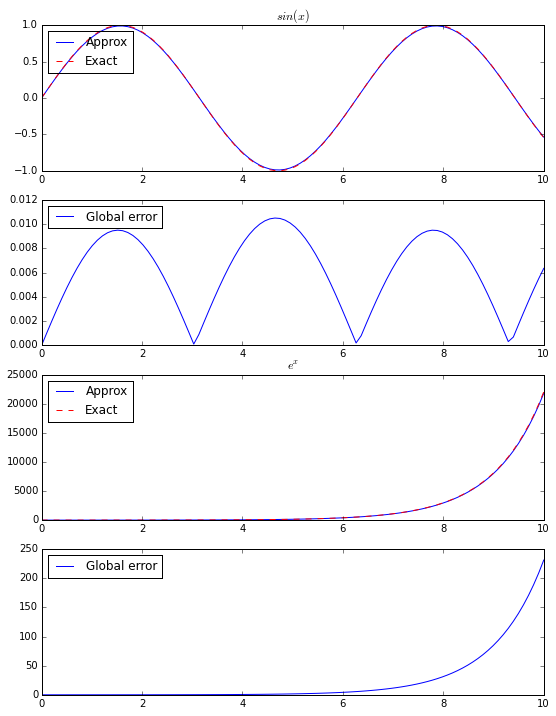

In [57]:
draw_system(fehlberg_4_5,
            0,
            [0.,1.],
            [lambda t,ys:np.cos(t),lambda t,ys: np.exp(t)],
            [lambda t: np.sin(t),lambda t: np.exp(t)],
            [u"$sin(x)$",u"$e^x$"])

Zadanie 2. Sterowanie krokiem w metodach r-k

In [103]:
def eps(y1,y2,eabs,erel):
    return eabs+erel*(np.abs(y1)+np.abs(y2))/2

def err(step,y1,y2,eabs,erel):
    assert y1.shape == y2.shape
    return np.sqrt(1/y1.shape[0]*np.sum(((np.abs(y1)-np.abs(y2))/eps(y1,y2,eabs,erel))**2))

def update_step(step,q,y1,y2,eabs,erel,factormin=0.5, factormax=5., factor=0.9):
    m = factor*(1/err(step,y1,y2,eabs,erel))**(1/(q+1))
    maks = factormin if factormin > m else m
    return step*min(factormax,maks)

def check_step(step,y1,y2,eabs,erel):
    if np.sum(np.abs(y1-y2) > eps(y1,y2,eabs,erel)) == 0:
        return True
    else:
        return False

In [137]:
def adaptive_rk(method, t_0, y_0s, approx, exact = None, labels=None, step = 2., eabs = 1e-10, erel = 1e-6):
    initial_step = step
    count = np.ceil(10.0/step)
    X = np.zeros(shape=(count,))
    X[0] = t_0
    Y = np.zeros(shape=(X.shape[0],len(approx),))
    Y[0,:] = np.asarray(y_0s)
    
    i = 1
    X[0] = t_0
    method_calls = 0
    while X[i-1]<t_0+10:
        if i == X.shape[0]:
            X.resize((X.shape[0]*2,))
            Y.resize((Y.shape[0]*2,Y.shape[1]))
            
        y_1, y_2 = method(tn=X[i-1],yn=Y[i-1,:],functions=approx,h=step)
        method_calls += 1
        if check_step(step,Y[i-1,:]+y_1,Y[i-1,:]+y_2,eabs,erel) == False:
            print "Iter ", i , ": Changing step :", step,
            step = update_step(step,min(method.ranks),Y[i-1,:]+y_1,Y[i-1,:]+y_2,eabs,erel)
            print " --> ", step
        else:
            Y[i,:] = Y[i-1,:] + y_2
            X[i] = X[i-1] + step
            i+=1
    total_steps = i
    if exact:
        RY = np.asarray([y(X) if y is not None else None for y in exact])

    
    figure_count = len(approx) + 1
    if exact:
        figure_count += len(filter(lambda x: x is not None,exact))
    figure = 1
    plt.figure(figsize = (9,figure_count*3))
    for i in range(len(approx)):
        ax = plt.subplot(figure_count,1,figure)
        if labels and labels[i]:
            ax.set_title(labels[i])
        plt.plot(X[0:total_steps],Y[0:total_steps,i], color = 'blue', label ='Approx')
        if exact and exact[i]:
            plt.plot(X[0:total_steps],RY[0:total_steps,i], color = 'red', linestyle='--', label='Exact')
        plt.legend(loc = 'upper left')
        figure += 1

        if exact and exact[i]:
            plt.subplot(figure_count,1,figure)
            plt.plot(X,np.abs(RY[i,0:total_steps]-Y[i,0:total_steps]), color = 'blue', label= 'Global error')
            plt.legend(loc = 'upper left')
            figure+=1
    
    ax = plt.subplot(figure_count+1,1,figure+1)
    ax.set_title("Step sizes")
    ax.set_yscale('log')
    steps = X[0:total_steps]-np.roll(X[0:total_steps],1)
    steps[0] = initial_step
    plt.plot(steps)
    plt.show()
    print "Total number of method calls :", method_calls, " number of function points: ", total_steps

Do testów używam rówan wahadła

$\epsilon_{abs}=1e-10$, $\epsilon_{rel}=1e-06$

Iter  1 : Changing step : 2.0  -->  1.0
Iter  1 : Changing step : 1.0  -->  0.5
Iter  1 : Changing step : 0.5  -->  0.363272652352
Iter  1 : Changing step : 0.363272652352  -->  0.339151476866
Iter  8 : Changing step : 0.339151476866  -->  0.229373389946
Iter  9 : Changing step : 0.229373389946  -->  0.177610664751
Iter  10 : Changing step : 0.177610664751  -->  0.166697035924
Iter  10 : Changing step : 0.166697035924  -->  0.159637484955
Iter  31 : Changing step : 0.159637484955  -->  0.125559673526


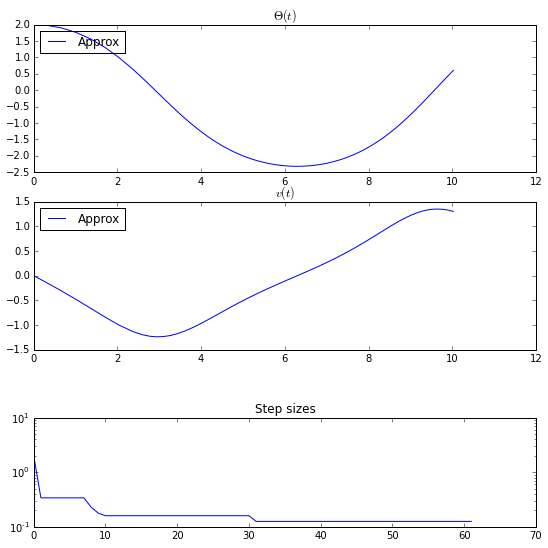

Total number of method calls : 70  number of function points:  62


In [138]:
adaptive_rk(fehlberg_4_5,
            0,
            [2,0],
            [lambda t,ys: ys[1],lambda t,ys: 2*ys[1]/(3.*20)-10/20*np.sin(ys[0])],
            labels=[u"$\Theta(t)$",u"$v(t)$"],
            step = 2.,
            eabs = 1e-10,
            erel = 1e-06)

To samo równanie, $\epsilon_{abs}=1e-14$, $\epsilon_{rel}=1e-09$

Iter  1 : Changing step : 2.0  -->  1.0
Iter  1 : Changing step : 1.0  -->  0.5
Iter  1 : Changing step : 0.5  -->  0.25
Iter  1 : Changing step : 0.25  -->  0.125
Iter  1 : Changing step : 0.125  -->  0.0685565106669
Iter  1 : Changing step : 0.0685565106669  -->  0.0607954630801
Iter  44 : Changing step : 0.0607954630801  -->  0.0567976357027
Iter  45 : Changing step : 0.0567976357027  -->  0.0532634146878
Iter  46 : Changing step : 0.0532634146878  -->  0.0493876751098
Iter  47 : Changing step : 0.0493876751098  -->  0.0448370136705
Iter  48 : Changing step : 0.0448370136705  -->  0.0387580832872
Iter  49 : Changing step : 0.0387580832872  -->  0.026895495371
Iter  176 : Changing step : 0.026895495371  -->  0.0234201406995
Iter  316 : Changing step : 0.0234201406995  -->  0.0162679423102


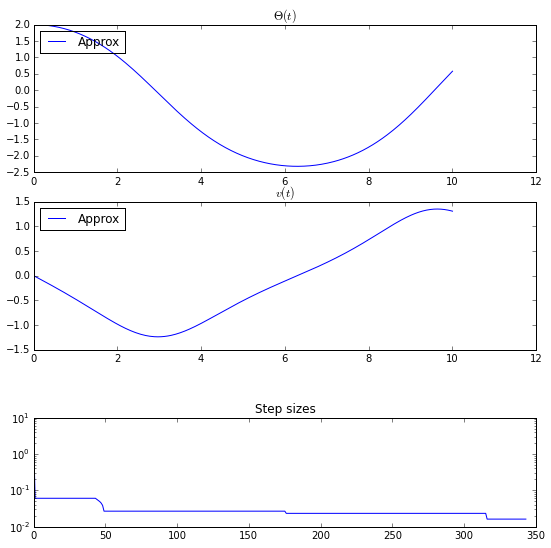

Total number of method calls : 357  number of function points:  344


In [139]:
adaptive_rk(fehlberg_4_5,
            0,
            [2,0],
            [lambda t,ys: ys[1],lambda t,ys: 2*ys[1]/(3.*20)-10/20*np.sin(ys[0])],
            labels=[u"$\Theta(t)$",u"$v(t)$"],
            step = 2.,
            eabs = 1e-14,
            erel = 1e-09)

Jeszcze raz to samo równanie, $\epsilon_{abs}=1e-20$, $\epsilon_{rel}=1e-13$

Iter  1 : Changing step : 0.2  -->  0.1
Iter  1 : Changing step : 0.1  -->  0.05
Iter  1 : Changing step : 0.05  -->  0.025
Iter  1 : Changing step : 0.025  -->  0.0125
Iter  1 : Changing step : 0.0125  -->  0.00685709344678
Iter  1 : Changing step : 0.00685709344678  -->  0.00608280021724
Iter  472 : Changing step : 0.00608280021724  -->  0.00586201093212
Iter  473 : Changing step : 0.00586201093212  -->  0.00562939572845
Iter  474 : Changing step : 0.00562939572845  -->  0.00536869883268
Iter  475 : Changing step : 0.00536869883268  -->  0.00506443549805
Iter  476 : Changing step : 0.00506443549805  -->  0.00469504251994
Iter  477 : Changing step : 0.00469504251994  -->  0.00421389507693
Iter  478 : Changing step : 0.00421389507693  -->  0.00347472455366
Iter  479 : Changing step : 0.00347472455366  -->  0.00248948157634


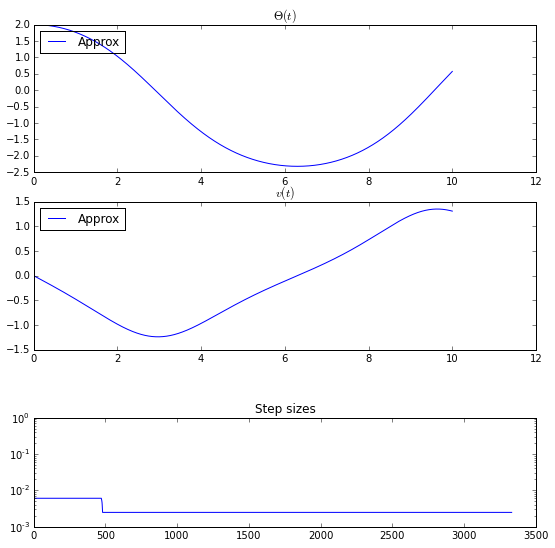

Total number of method calls : 3345  number of function points:  3332


In [140]:
adaptive_rk(fehlberg_4_5,
            0,
            [2,0],
            [lambda t,ys: ys[1],lambda t,ys: 2*ys[1]/(3.*20)-10/20*np.sin(ys[0])],
            labels=[u"$\Theta(t)$",u"$v(t)$"],
            step = 0.2,
            eabs = 1e-20,
            erel = 1e-13)

To samo równanie rozwiązane przy pomocy metody R-K-F 7(8)

Iter  1 : Changing step : 2.0  -->  1.0
Iter  1 : Changing step : 1.0  -->  0.5
Iter  1 : Changing step : 0.5  -->  0.25
Iter  1 : Changing step : 0.25  -->  0.128638116053
Iter  1 : Changing step : 0.128638116053  -->  0.0760314214007
Iter  1 : Changing step : 0.0760314214007  -->  0.0488840029122
Iter  1 : Changing step : 0.0488840029122  -->  0.0333531201179
Iter  1 : Changing step : 0.0333531201179  -->  0.0238779115054
Iter  1 : Changing step : 0.0238779115054  -->  0.0178155619158
Iter  1 : Changing step : 0.0178155619158  -->  0.0137821491981
Iter  1 : Changing step : 0.0137821491981  -->  0.0110070586045
Iter  1 : Changing step : 0.0110070586045  -->  0.00904106917195
Iter  1 : Changing step : 0.00904106917195  -->  0.00761216480943
Iter  1 : Changing step : 0.00761216480943  -->  0.00655006417429
Iter  1 : Changing step : 0.00655006417429  -->  0.0057449514762
Iter  1 : Changing step : 0.0057449514762  -->  0.00512407204296
Iter  1 : Changing step : 0.00512407204296  -->  0.00

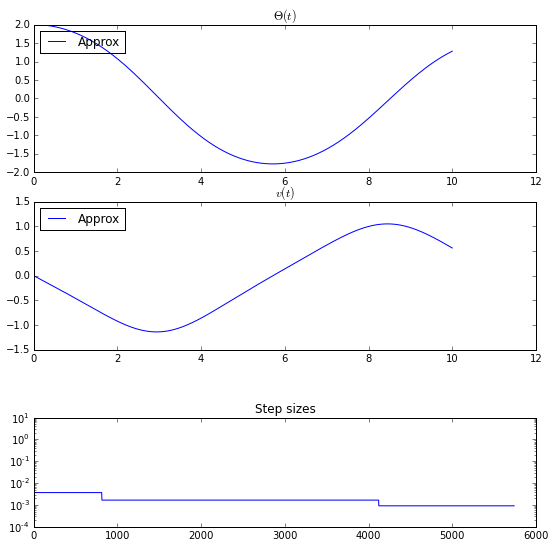

Total number of method calls : 5769  number of function points:  5741


In [156]:
adaptive_rk(fehlberg_7_8,
            0,
            [2,0.],
            [lambda t,ys: ys[1],lambda t,ys: -2.*ys[1]/(3.*20)-10/20*np.sin(ys[0])],
            labels=[u"$\Theta(t)$",u"$v(t)$"],
            step = 2.)

metoda adamsa  
Do $k$-krokowej metody adamsa potrzebujemy $k$ poprzednich wartosci funkcji  
Rząd metody jest zależny od liczby kroków, więc użyjemy metody r-k odpowiedniego rzędu do znalezienia poczatkowych wartości 

In [ ]:
def adams_method(method, functions, step=0.1):
    # get first k interpolation points
    function_points = 